In [1]:
import sys, os
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

In [16]:
# reproducibility
np.random.seed(42)
# data
time = np.arange(100)
#time

In [17]:

stationary = np.random.normal(loc=0, scale=1.0, size=len(time))
#stationary

In [18]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

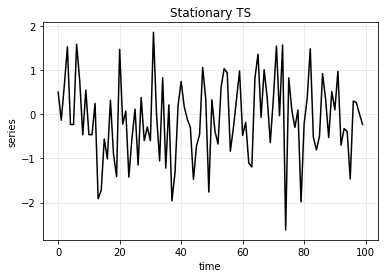

In [19]:
run_sequence_plot(time, stationary, 
                  title="Stationary TS")

In [21]:
# seed to start series
seed = 3.14

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
#lagged

In [7]:
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]

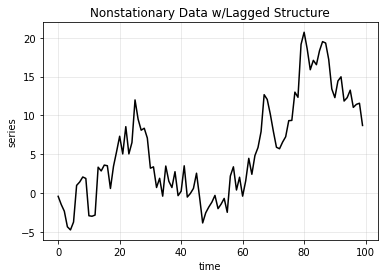

In [8]:
run_sequence_plot(time, lagged,
                  title="Nonstationary Data w/Lagged Structure")

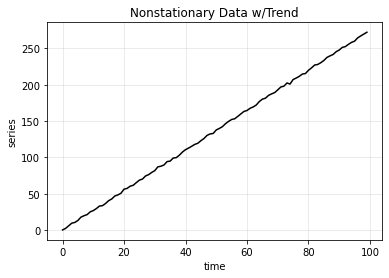

In [9]:
trend = (time * 2.75) + stationary
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")
#stationary

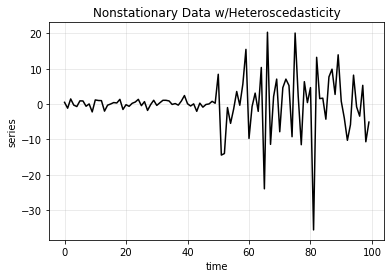

In [10]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)
#heteroscedasticity
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

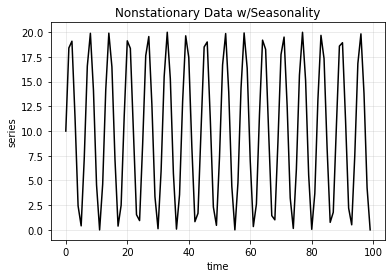

In [11]:
seasonality = 10 + np.sin(time) * 10
run_sequence_plot(time, seasonality,
                  title="Nonstationary Data w/Seasonality")

# Excercise1

In [12]:
# create time variable
mytime = np.arange(100)

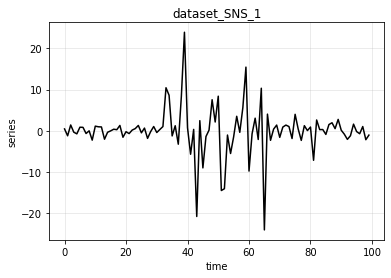

In [13]:
# get data
path_to_file = "./"
dataset_SNS_1 = np.load(path_to_file + "dataset_SNS_1.npy")
dataset_SNS_2 = np.load(path_to_file + "dataset_SNS_2.npy")
# plot dataset_SNS_1
run_sequence_plot(mytime, dataset_SNS_1, title="dataset_SNS_1")

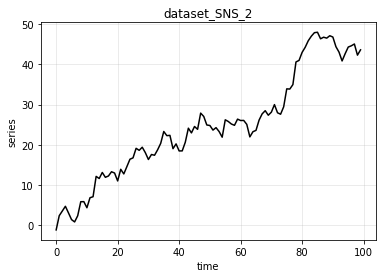

In [14]:
# plot dataset_SNS_1
run_sequence_plot(mytime, dataset_SNS_2, title="dataset_SNS_2")

# Section 2: Identifying Stationarity

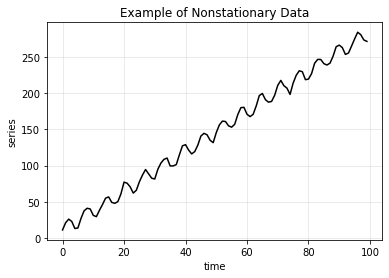

In [22]:
trend_seasonality = trend + seasonality + stationary
run_sequence_plot(time, trend_seasonality,
                  title="Example of Nonstationary Data")

In [23]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)

In [32]:
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


In [38]:
np.mean(chunks,  axis=1)

array([123.92194162, 126.8486929 , 129.22847914, 131.69603678,
       134.23637475, 137.35179609, 140.20509548, 143.15399517,
       145.47973086, 148.08939204])

In [37]:
np.var(chunks, axis=1)

array([62.54798758, 60.86616531, 58.74556884, 57.2320973 , 58.9505395 ,
       65.11109596, 67.70905522, 54.81013753, 62.67659981, 61.642402  ])

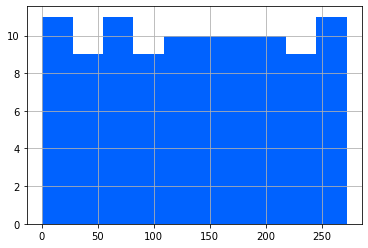

In [42]:
pd.Series(trend).hist();

# Augmented Dickey-Fuller Test

In [43]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary)

In [44]:
print(adf)

-10.084425913669714


In [45]:
print(pvalue)

1.1655044784188669e-17


In [46]:
print(nobs)

99


In [47]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


# ### Exercise #2

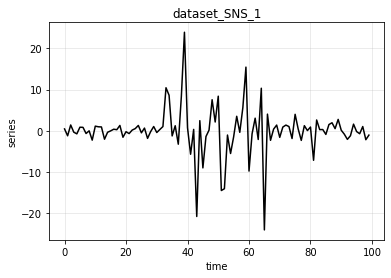

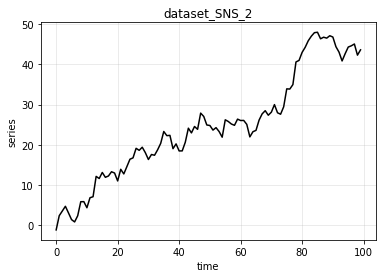

In [48]:
# run-sequence plots
run_sequence_plot(time, dataset_SNS_1,
                  title="dataset_SNS_1")
plt.show()
run_sequence_plot(time, dataset_SNS_2,
                  title="dataset_SNS_2")

In [49]:
# chunked stats

# split data into 10 chunks
chunks1 = np.split(dataset_SNS_1, indices_or_sections=10)
chunks2 = np.split(dataset_SNS_2, indices_or_sections=10)

print("[chunk1]")
print("Mean: \n", np.mean(chunks1, axis=1))
print("Var: \n", np.var(chunks1, axis=1))
print()
print("[chunk2]")
print("Mean: \n", np.mean(chunks2, axis=1))
print("Var: \n", np.var(chunks2, axis=1))

[chunk1]
Mean: 
 [-0.14368349  0.121089    0.04714784  4.92083495 -2.32626967 -0.3706503
 -1.95084875  0.34634898  0.30483126 -0.51907842]
Var: 
 [ 1.1064868   1.16521661  0.76635153 59.91993023 55.94682032 79.168351
 77.81561226  3.18839451  7.29302955  1.34694601]

[chunk2]
Mean: 
 [ 2.8186155  10.51083038 16.02252814 19.73251898 23.26775272 24.60790371
 25.54323527 32.73577811 46.28942898 43.77348672]
Var: 
 [ 4.50258195  9.30343813  7.51911006  4.97894604  9.42707844  1.77171835
  3.96080036 22.71299455  2.22467478  2.47819651]


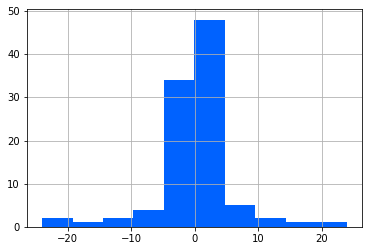

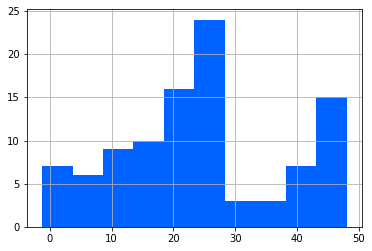

In [50]:
# histograms
pd.Series(dataset_SNS_1).hist()
plt.show()
pd.Series(dataset_SNS_2).hist();

# Example #1: Remove Trend & Seasonality with Statsmodels

In [51]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)

ADF:  0.29403605928893484
p-value:  0.9770692037868642


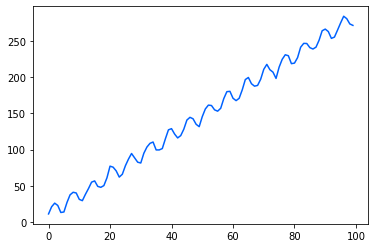

In [52]:
plt.plot(trend_seasonality)

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
ss_decomposition = seasonal_decompose(x=trend_seasonality, model='multiplicative ', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid


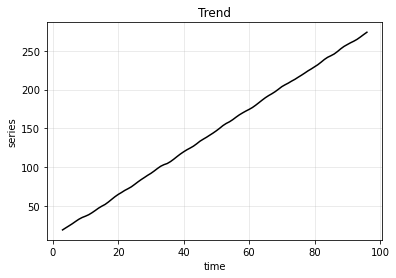

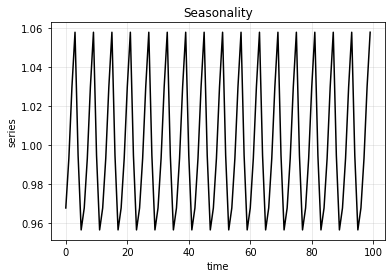

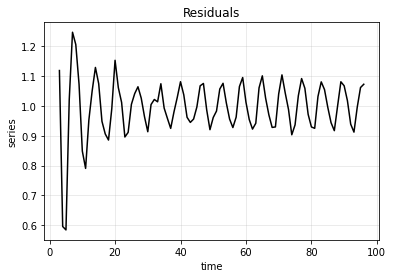

In [61]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

In [67]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])

In [68]:
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -1.8668760572006118
p-value:  0.34780044259028475


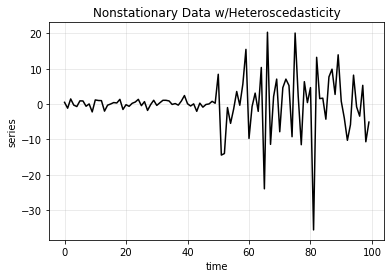

In [69]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

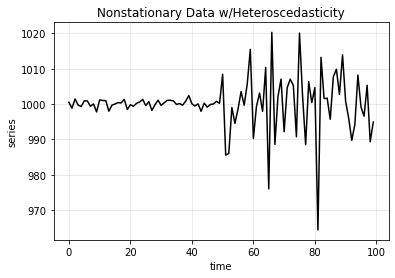

In [74]:
new_hetero = heteroscedasticity + 38
run_sequence_plot(time, new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

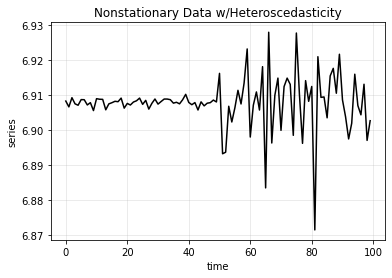

In [75]:
log_new_hetero = np.log(new_hetero)
run_sequence_plot(time, log_new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

# Exercise #3

In [76]:
dataset_SNS_1_log = np.log( dataset_SNS_1 + 25 )



In [77]:
dataset_SNS_2_diff = dataset_SNS_2[:-1] - dataset_SNS_2[1:]

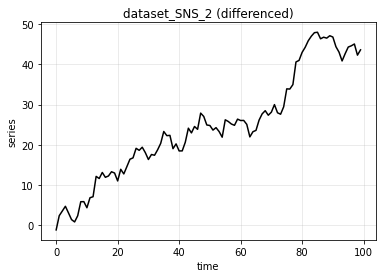

In [83]:
run_sequence_plot(time, dataset_SNS_2,
                  title="dataset_SNS_2 (differenced)")

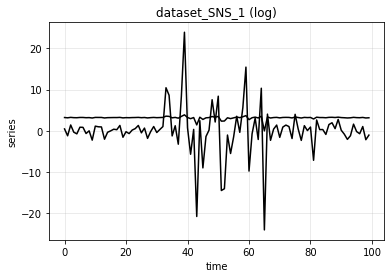

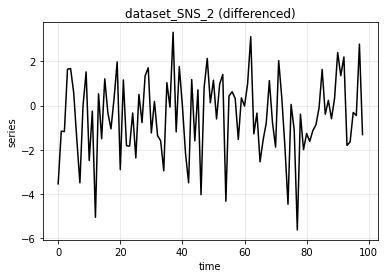

In [79]:
# run-sequence plots
run_sequence_plot(time, dataset_SNS_1,
                  title="orignal")
run_sequence_plot(time, dataset_SNS_1_log,
                  title="dataset_SNS_1 (log)")
plt.show()
run_sequence_plot(time[:-1], dataset_SNS_2_diff,
                  title="dataset_SNS_2 (differenced)")